# Online rentail II (Đề tài giữa kì)

## PHẦN A: TỔNG QUAN VẤN ĐỀ (PROJECT OVERVIEW)

### (1) Định nghĩa vấn đề (Problem Definition)

<h1>📦 Giới thiệu Dữ liệu — Online Retail II</h1>
<h2> Bối cảnh dữ liệu</h2>

Bộ dữ liệu Online Retail II bao gồm toàn bộ giao dịch của một công ty bán lẻ trực tuyến tại Vương Quốc Anh trong khoảng thời gian từ 01/12/2009 đến 09/12/2011.

Công ty này chủ yếu kinh doanh các sản phẩm quà tặng độc đáo phù hợp cho mọi dịp. Phần lớn khách hàng là các nhà bán buôn (wholesalers).


<br>

![](https://storage.googleapis.com/kaggle-datasets-images/430934/821251/c39efaef67a0a3da5058639ddfdfee47/dataset-cover.jpg?t=2019-12-02-13-20-29)

<br>

<h2> Mô tả thuộc tính (Features Information)</h2>

| Thuộc tính      | Loại dữ liệu | Mô tả                                                                                                     |
| --------------- | ------------ | --------------------------------------------------------------------------------------------------------- |
| **InvoiceNo**   | Nominal      | Mã số hóa đơn gồm 6 chữ số, duy nhất cho mỗi giao dịch. Nếu bắt đầu bằng chữ **'C'** → hóa đơn bị **hủy** |
| **StockCode**   | Nominal      | Mã sản phẩm (5 chữ số) duy nhất cho mỗi mặt hàng                                                          |
| **Description** | Nominal      | Tên sản phẩm                                                                                              |
| **Quantity**    | Numeric      | Số lượng sản phẩm trong một giao dịch                                                                     |
| **InvoiceDate** | Numeric      | Ngày và giờ tạo hóa đơn                                                                                   |
| **UnitPrice**   | Numeric      | Đơn giá của sản phẩm (Bảng Anh £)                                                                         |
| **CustomerID**  | Nominal      | Mã khách hàng (5 chữ số), duy nhất mỗi khách hàng                                                         |
| **Country**     | Nominal      | Quốc gia nơi khách hàng cư trú                                                                            |




<h2> Tài liệu tham khảo</h2>

Chen, D., Sain, S.L., & Guo, K. (2012). Data mining for the online retail industry: A case study of RFM model-based customer segmentation using data mining, Journal of Database Marketing and Customer Strategy Management, 19(3), 197–208.

Chen, D., Guo, K. & Ubakanma, G. (2015). Predicting customer profitability over time based on RFM time series, International Journal of Business Forecasting and Marketing Intelligence, 2(1), 1–18.

Chen, D., Guo, K., & Li, Bo. (2019). Predicting Customer Profitability Dynamically over Time, CIARP 2019, Havana, Cuba.

Laha Ale et al. (2019). Online Proactive Caching in Mobile Edge Computing Using Bidirectional Deep Recurrent Neural Network, IEEE IoT Journal, 6(3), 5520–5530.

Rina Singh et al. (2018). Prefix and Suffix Sequential Pattern Mining, Advances in Data Mining.

### (2) Câu hỏi nghiên cứu (Research Questions)

#### 1.Câu hỏi Mô tả (Descriptive)

Câu 1: Top 10 sản phẩm bán chạy nhất là gì?

Câu 2: Doanh thu theo thời gian biến động ra sao?

#### 2.Câu hỏi Khám phá/Chẩn đoán (Exploratory/Diagnostic)

Câu 1: Các nhóm khách hàng nào đem lại doanh thu cao nhất?

Câu 2: Tại sao doanh số giảm vào Quý 2?

#### 3.Câu hỏi Dự đoán (Predictive)

Câu 1: Doanh thu tháng tới dự kiến là bao nhiêu?

Câu 2: Khách hàng A có khả năng sẽ mua hàng (churn) hay không?

#### 4.Câu hỏi về Kết hợp (Association)

Câu 1: Những sản phẩm nào thường được mua cùng nhau?

## PHẦN B: CHUẨN BỊ VÀ TIỀN XỬ LÝ DỮ LIỆU (DATA PREPARATION)

### (1) Tải thư viện và Dữ liệu (Load Libraries & Data)

#### 1.Thư viện cốt lõi (Xử lý dữ liệu)

In [ ]:
import pandas as pd # Dùng để xử lý dữ liệu dạng bảng
import numpy as np # Dùng cho phép toán số học và đại số tuyến tính

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

#### 2.Thư viện Trực quan hóa (Vẽ biểu đồ)

In [ ]:
import matplotlib.pyplot as plt # Thư viện vẽ biểu đồ 2D cơ bản
import seaborn as sns # Vẽ biểu đồ thống kê cao cấp

# Cài đặt mặc định cho biểu đồ đẹp hơn
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

#### 3.Thư viện Tiền xử lý (Chuẩn bị dữ liệu)

In [ ]:
from sklearn.model_selection import train_test_split # Chia tập test và train
from sklearn.preprocessing import StandardScaler, MinMaxScaler # Chuẩn hóa dữ liệu

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

#### 4.Thư viện Mô hình hóa (Machine Learning)

In [ ]:
# --- 4.1. Phân cụm (Clustering) ---
from sklearn.cluster import KMeans                 # Cho bài toán Phân loại khách hàng

# --- 4.2. Phân tích kết hợp (Association) ---
# Cần cài đặt: !pip install mlxtend
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# --- 4.3. Phân loại & Hồi quy (Classification & Regression) ---
from sklearn.linear_model import LinearRegression    # Mô hình Hồi quy tuyến tính
from sklearn.tree import DecisionTreeClassifier      # Mô hình Cây quyết định
from sklearn.ensemble import RandomForestClassifier  # Mô hình Rừng ngẫu nhiên
from sklearn.neighbors import KNeighborsClassifier   # Mô hình K-Láng giềng gần nhất (k-NN)
from sklearn.svm import SVC                          # Mô hình Support Vector Machine (SVM)
from sklearn.naive_bayes import GaussianNB           # Mô hình Naive Bayes
# import xgboost as xgb                              # Mô hình XGBoost (cần !pip install xgboost)

# --- 4.4. Giảm chiều dữ liệu (Dimensionality Reduction) ---
from sklearn.decomposition import PCA                # Cho bài toán Giảm chiều dữ liệu

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

#### 5.Thư viện Đánh giá mô hình (Evaluation)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Cho bài toán Phân loại
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error  # Cho bài toán Hồi quy
from sklearn.metrics import silhouette_score  # Dùng để đánh giá mô hình Clustering (K-Means)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

#### 6.Thư viện tiện ích

In [ ]:
# --- 6.1 Tắt warning không cần thiết ---
import warnings
warnings.filterwarnings('ignore')

# --- 6.2 Tải file data trên drive ---
from google.colab import drive
drive.mount('/content/drive')


# --- 6.3 đổi sang kiểu ngầy tháng
import datetime as dt

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### 7.Tải dữ liệu (Load Data)

In [ ]:
file_path = '/content/drive/MyDrive/online_retail_II.csv'
# Đọc file và xử lý nếu có lỗi
try:
    df = pd.read_csv(file_path)
    print("Tải dữ liệu thành công!")

    # Hiển thị 5 dòng đầu tiên để kiểm tra
    print(df.head())

except FileNotFoundError:
    print(f"LỖI: Không tìm thấy file tại đường dẫn: {file_path}")
    print("Mẹo: Hãy kiểm tra lại tên thư mục (phân biệt chữ hoa/thường) trên Drive của bạn.")

Tải dữ liệu thành công!
  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

           InvoiceDate  Price  Customer ID         Country  
0  2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1  2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2  2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3  2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4  2009-12-01 07:45:00   1.25      13085.0  United Kingdom  


### (2) Đánh giá sơ bộ dữ liệu (Initial Data Assessment)

In [ ]:
# Số dòng và cột
print(f'+ Shape: {df.shape}')

+ Shape: (1067371, 8)


Bộ dữ liệu gồm 1067371 dòng và 8 cột dữ liệu

In [ ]:
# head, tail để xem 5 dòng đầu và 5 dòng cuối dữ liệu
print("5 dòng đầu và 5 dòng cuối dữ liệu:\n")
print(f'+ Contents: ')
display(df.head(5))
display(df.tail(5))

5 dòng đầu và 5 dòng cuối dữ liệu:

+ Contents: 


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France
1067370,581587,POST,POSTAGE,1,2011-12-09 12:50:00,18.00,12680.0,France


Bộ dữ liệu được sắp xếp theo từng quốc gia cột "Country"

In [ ]:
# info để xem thông tin dữ liệu Tên cột (Column) Số lượng giá trị không rỗng Non-Null Count (missing values/NaN).Kiểu dữ liệu (Dtype)
print("Thông tin dữ liệu:\n")
print(f'+ Info: \n{df.info()}')

Thông tin dữ liệu:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB
+ Info: 
None


**Dữ liệu chưa "sạch" và không sẵn sàng để phân tích:**

+ Tổng cộng gần 1067371 dòng đã được tải thành công.

+ Không có dữ liệu bị thiếu (null).

+ Các kiểu dữ liệu (Dtypes) đều chính xác: Invoice, StockCode, Description, InvoiceDate, Country là object (chuỗi), Quantity là int64 (số nguyên), Price và Customer ID là float64 (số thực)

+ Description: Bị thiếu khoảng 4,382 dòng.

+ Customer ID: Bị thiếu rất nhiều (hơn 243,000 dòng).

+ InvoiceDate: Đang ở kiểu object (chuỗi), không thể dùng để phân tích thời gian.

+ Customer ID: Đang ở kiểu float64 (số thực) do có giá trị thiếu (NaN).

### (3) Làm sạch dữ liệu (Data Cleaning)

In [ ]:
print(f"Số dòng ban đầu: {len(df)}")

Số dòng ban đầu: 1067371


#### 1.Xử lý Dữ liệu Bị Thiếu (Missing Data)

In [ ]:
# Xóa các dòng không có Customer ID, vì đây là thông tin cốt lõi
# để phân tích hành vi khách hàng.
df.dropna(subset=['Customer ID'], inplace=True)
print(f"Số dòng sau khi xóa Customer ID bị thiếu: {len(df)}")

# Xóa các dòng không có Mô tả sản phẩm (nếu còn)
df.dropna(subset=['Description'], inplace=True)
print(f"Số dòng sau khi xóa Description bị thiếu: {len(df)}")

Số dòng sau khi xóa Customer ID bị thiếu: 824364
Số dòng sau khi xóa Description bị thiếu: 824364


#### 2.Xử lý Hủy Đơn và Dữ liệu Không Hợp lệ

In [ ]:
# 2.1. Loại bỏ các hóa đơn bị hủy (InvoiceNo bắt đầu bằng 'C')
df = df[~df['Invoice'].astype(str).str.startswith('C')]
print(f"Số dòng sau khi loại bỏ đơn hủy ('C'): {len(df)}")

# 2.2. Loại bỏ số lượng âm (thường là hàng trả lại không qua đơn 'C')
df = df[df['Quantity'] > 0]
print(f"Số dòng sau khi loại bỏ Quantity <= 0: {len(df)}")

# 2.3. Loại bỏ các mặt hàng có giá bằng 0 (hàng tặng, lỗi, v.v.)
df = df[df['Price'] > 0]
print(f"Số dòng sau khi loại bỏ Price <= 0: {len(df)}")

Số dòng sau khi loại bỏ đơn hủy ('C'): 805620
Số dòng sau khi loại bỏ Quantity <= 0: 805620
Số dòng sau khi loại bỏ Price <= 0: 805549


#### 3.Sửa Kiểu Dữ liệu (Data Types)

In [ ]:
# Chuyển InvoiceDate từ object (chuỗi) sang datetime để phân tích thời gian
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Chuyển Customer ID từ float (ví dụ: 12345.0) sang string
# Chúng ta dùng string (chuỗi) thay vì int (số) để đảm bảo không bị mất số 0 ở đầu (nếu có) và vì ID không dùng để tính toán.
df['Customer ID'] = df['Customer ID'].astype(int).astype(str)

#### 4.Lọc các Mã Hàng (StockCode) Đặc Biệt

In [ ]:
# Loại bỏ các mã không phải sản phẩm như 'POST' (phí vận chuyển)
special_codes = ['POST']
df = df[~df['StockCode'].isin(special_codes)]
print(f"Số dòng sau khi loại bỏ mã đặc biệt (ví dụ: POST): {len(df)}")

Số dòng sau khi loại bỏ mã đặc biệt (ví dụ: POST): 803711


#### 5.Xử lý Trùng lặp (Duplicates)

In [ ]:
df.drop_duplicates(inplace=True)
print(f"Số dòng cuối cùng sau khi xóa trùng lặp: {len(df)}")

Số dòng cuối cùng sau khi xóa trùng lặp: 777622


#### 6.Kết quả khi làm sạch

In [ ]:
# --- Kiểm tra lại kết quả ---
print("\n--- Hoàn tất làm sạch! ---")
print("Thông tin dữ liệu (df.info()) sau khi làm sạch:")
df.info()

print("\n5 dòng dữ liệu đầu tiên sau khi làm sạch:")
display(df.head())


--- Hoàn tất làm sạch! ---
Thông tin dữ liệu (df.info()) sau khi làm sạch:
<class 'pandas.core.frame.DataFrame'>
Index: 777622 entries, 0 to 1067369
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      777622 non-null  object        
 1   StockCode    777622 non-null  object        
 2   Description  777622 non-null  object        
 3   Quantity     777622 non-null  int64         
 4   InvoiceDate  777622 non-null  datetime64[ns]
 5   Price        777622 non-null  float64       
 6   Customer ID  777622 non-null  object        
 7   Country      777622 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 53.4+ MB

5 dòng dữ liệu đầu tiên sau khi làm sạch:


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom


Dữ liệu hiện đã "sạch":

+ Bạn đã loại bỏ thành công tất cả các dòng bị thiếu Customer ID và các đơn hàng/mặt hàng không hợp lệ (hủy, giá 0, v.v.).

+ Số dòng đã giảm từ 1,067,371 xuống còn 777,622.

+ Bạn không còn bất kỳ giá trị null nào (777622 non-null).

+ Các kiểu dữ liệu quan trọng đã được sửa (InvoiceDate là datetime64[ns], Customer ID là object).

### (4) Tạo đặc trưng (Feature Engineering)

In [ ]:
# Tạo 1 dataframe mới tên df_cleaned tránh ảnh hưởng df gốc
df_cleaned = df.copy()

#### 1.Tạo cột TotalPrice (Tổng giá trị = Số lượng * Đơn giá)

In [ ]:
# Đây là cột quan trọng nhất để phân tích doanh thu.
df_cleaned['TotalPrice'] = df_cleaned['Quantity'] * df_cleaned['Price']

In [ ]:
display(df_cleaned.head())

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0


#### 2.Trích xuất các đặc trưng về thời gian từ cột InvoiceDate

In [ ]:
# Cột InvoiceDate đã được chuyển sang kiểu datetime ở bước làm sạch
df_cleaned['Year'] = df_cleaned['InvoiceDate'].dt.year
df_cleaned['Month'] = df_cleaned['InvoiceDate'].dt.month
df_cleaned['Quarter'] = df_cleaned['InvoiceDate'].dt.quarter # Thêm Quý để trả lời câu hỏi Q2
df_cleaned['Day'] = df_cleaned['InvoiceDate'].dt.day
df_cleaned['DayOfWeek'] = df_cleaned['InvoiceDate'].dt.dayofweek # (0 = Thứ Hai, 6 = Chủ Nhật)
df_cleaned['Hour'] = df_cleaned['InvoiceDate'].dt.hour

# Tạo cột 'MonthYear' để dễ dàng nhóm theo tháng/năm khi vẽ biểu đồ
df_cleaned['MonthYear'] = df_cleaned['InvoiceDate'].dt.to_period('M')


In [ ]:
display(df_cleaned.head())

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,Year,Month,Quarter,Day,DayOfWeek,Hour,MonthYear
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4,2009,12,4,1,1,7,2009-12
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,2009,12,4,1,1,7,2009-12
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,2009,12,4,1,1,7,2009-12
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8,2009,12,4,1,1,7,2009-12
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0,2009,12,4,1,1,7,2009-12


### (5) Chuẩn hóa & Mã hóa (Scaling & Encoding)

In [ ]:
# 1.1. Xác định "ngày hôm nay" (snapshot_date)
snapshot_date = df_cleaned['InvoiceDate'].max() + dt.timedelta(days=1)

# 1.2. Tính toán R, F, M cho mỗi khách hàng
rfm_data = df_cleaned.groupby('Customer ID').agg(
    Recency=('InvoiceDate', lambda x: (snapshot_date - x.max()).days),
    Frequency=('Invoice', 'nunique'),
    Monetary=('TotalPrice', 'sum')
)
display(rfm_data.head())

,Recency,Frequency,Monetary
Customer ID,,,
12346,326,12,77556.46
12347,2,8,4921.53
12348,75,5,1658.40
12349,19,3,3678.69
12350,310,1,294.40


In [ ]:
# Chỉ lấy 3 cột R, F, M để chuẩn hóa
rfm_features_to_scale = rfm_data[['Recency', 'Frequency', 'Monetary']]

# Khởi tạo Scaler
scaler = StandardScaler()

# Fit và Transform dữ liệu
rfm_scaled_data = scaler.fit_transform(rfm_features_to_scale)

print("\nĐã chuẩn hóa dữ liệu RFM thành công.")
print("Dữ liệu sau khi chuẩn hóa (5 dòng đầu):")
print(rfm_scaled_data[:5])


# ---  Huấn luyện mô hình K-Means ---
kmeans_model = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans_model.fit(rfm_scaled_data)

# Gán nhãn cụm (cluster) trở lại DataFrame rfm_data gốc
rfm_data['Cluster'] = kmeans_model.labels_

print("\nĐã huấn luyện mô hình KMeans và gán nhãn Cluster.")
display(rfm_data.head())


Đã chuẩn hóa dữ liệu RFM thành công.
Dữ liệu sau khi chuẩn hóa (5 dòng đầu):
[[ 0.59611198  0.44158182  5.17851871]
 [-0.95243145  0.13322877  0.13784623]
 [-0.60353123 -0.09803602 -0.08860638]
 [-0.87118071 -0.25221254  0.05159641]
 [ 0.5196407  -0.40638907 -0.18326438]]

Đã huấn luyện mô hình KMeans và gán nhãn Cluster.


,Recency,Frequency,Monetary,Cluster
Customer ID,,,,
12346,326,12,77556.46,1
12347,2,8,4921.53,1
12348,75,5,1658.40,1
12349,19,3,3678.69,1
12350,310,1,294.40,0


## PHẦN C: PHÂN TÍCH DỮ LIỆU (PTDL - 7 ĐIỂM)

### (1) Phân tích khám phá dữ liệu (Exploratory Data Analysis - EDA)

#### 1.Top 10 sản phẩm bán chạy nhất là gì? (Câu hỏi mô tả)

--- Bắt đầu Phần C (1): Phân tích Khám phá (EDA) ---

--- Top 10 Sản phẩm bán chạy nhất (theo Số lượng) ---
Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     105185
WHITE HANGING HEART T-LIGHT HOLDER     91757
PAPER CRAFT , LITTLE BIRDIE            80995
ASSORTED COLOUR BIRD ORNAMENT          78234
MEDIUM CERAMIC TOP STORAGE JAR         77916
JUMBO BAG RED RETROSPOT                74224
BROCADE RING PURSE                     70082
PACK OF 60 PINK PAISLEY CAKE CASES     54592
60 TEATIME FAIRY CAKE CASES            52828
PACK OF 72 RETRO SPOT CAKE CASES       45129
Name: Quantity, dtype: int64

Đang tạo biểu đồ...
Đã lưu biểu đồ 'top_10_products_barchart.png'


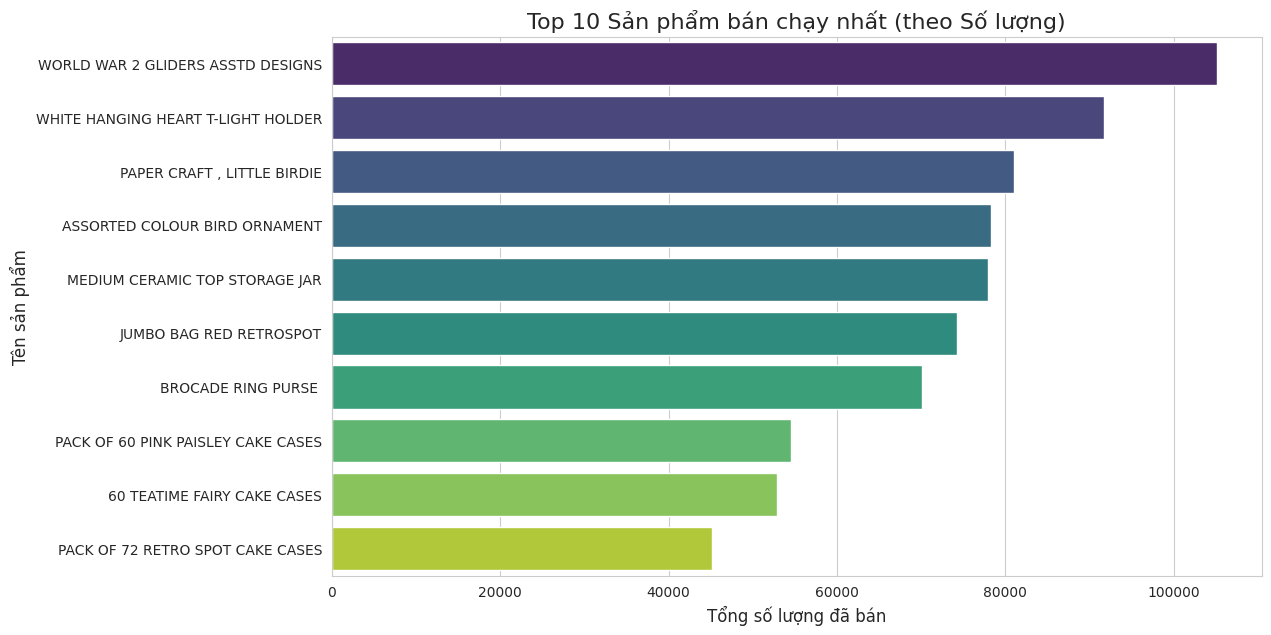

In [ ]:

print("--- Bắt đầu Phần C (1): Phân tích Khám phá (EDA) ---")

# --- Câu 1: Top 10 sản phẩm bán chạy nhất (theo Số lượng) ---
top_10_products = df_cleaned.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

print("\n--- Top 10 Sản phẩm bán chạy nhất (theo Số lượng) ---")
print(top_10_products)
print("\nĐang tạo biểu đồ...")

# Trực quan hóa Top 10
plt.figure(figsize=(12, 7))
sns.barplot(x=top_10_products.values, y=top_10_products.index, palette='viridis')
plt.title('Top 10 Sản phẩm bán chạy nhất (theo Số lượng)', fontsize=16)
plt.xlabel('Tổng số lượng đã bán', fontsize=12)
plt.ylabel('Tên sản phẩm', fontsize=12)
plt.savefig("top_10_products_barchart.png")
print("Đã lưu biểu đồ 'top_10_products_barchart.png'")
plt.show()

#### 2.Doanh thu theo thời gian biến động ra sao? (Câu hỏi mô tả)


--- Tổng doanh thu theo Tháng/Năm ---
MonthYear
2009-12     680601.010
2010-01     553112.672
2010-02     501838.956
2010-03     693654.871
2010-04     588264.002
2010-05     594632.380
2010-06     632805.930
2010-07     586900.670
2010-08     599455.720
2010-09     824629.951
2010-10    1026508.010
2010-11    1158347.122
2010-12     565992.730
2011-01     562992.310
2011-02     442918.920
2011-03     588756.760
2011-04     464964.381
2011-05     663996.400
2011-06     654536.030
2011-07     593651.561
2011-08     638865.090
2011-09     944795.702
2011-10    1027648.950
2011-11    1145855.660
2011-12     514430.440
Name: TotalPrice, dtype: float64

Đang tạo biểu đồ...
Đã lưu biểu đồ 'revenue_over_time_linechart.png'


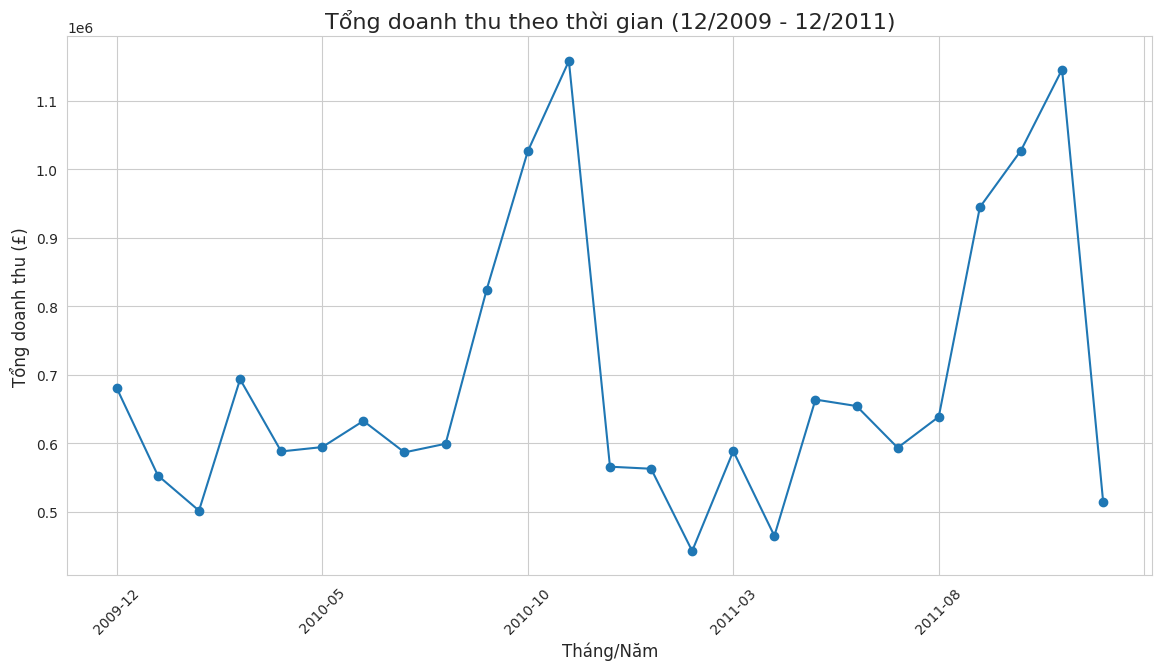

In [ ]:
# --- Câu 2: Doanh thu theo thời gian (theo Tháng/Năm) ---

# Nhóm theo MonthYear (đã tạo ở B4) và tính tổng TotalPrice
revenue_over_time = df_cleaned.groupby('MonthYear')['TotalPrice'].sum()

print("\n--- Tổng doanh thu theo Tháng/Năm ---")
# Chuyển đổi index (dạng Period) sang string để hiển thị đẹp hơn
revenue_over_time.index = revenue_over_time.index.to_series().astype(str)
print(revenue_over_time)
print("\nĐang tạo biểu đồ...")

# Trực quan hóa Doanh thu theo thời gian
plt.figure(figsize=(14, 7))
revenue_over_time.plot(kind='line', marker='o')
plt.title('Tổng doanh thu theo thời gian (12/2009 - 12/2011)', fontsize=16)
plt.xlabel('Tháng/Năm', fontsize=12)
plt.ylabel('Tổng doanh thu (£)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig("revenue_over_time_linechart.png")
print("Đã lưu biểu đồ 'revenue_over_time_linechart.png'")
plt.show()

3.Tại sao doanh số giảm vào Quý 2? (Câu hỏi Chẩn đoán)


--- Tổng doanh thu theo Quý/Năm ---
Quarter            1            2            3            4
Year                                                       
2009             NaN          NaN          NaN   680601.010
2010     1748606.499  1815702.312  2010986.341  2750847.862
2011     1594667.990  1783496.811  2177312.353  2687935.050

Đang tạo biểu đồ...
Đã lưu biểu đồ 'revenue_by_quarter_barchart.png'


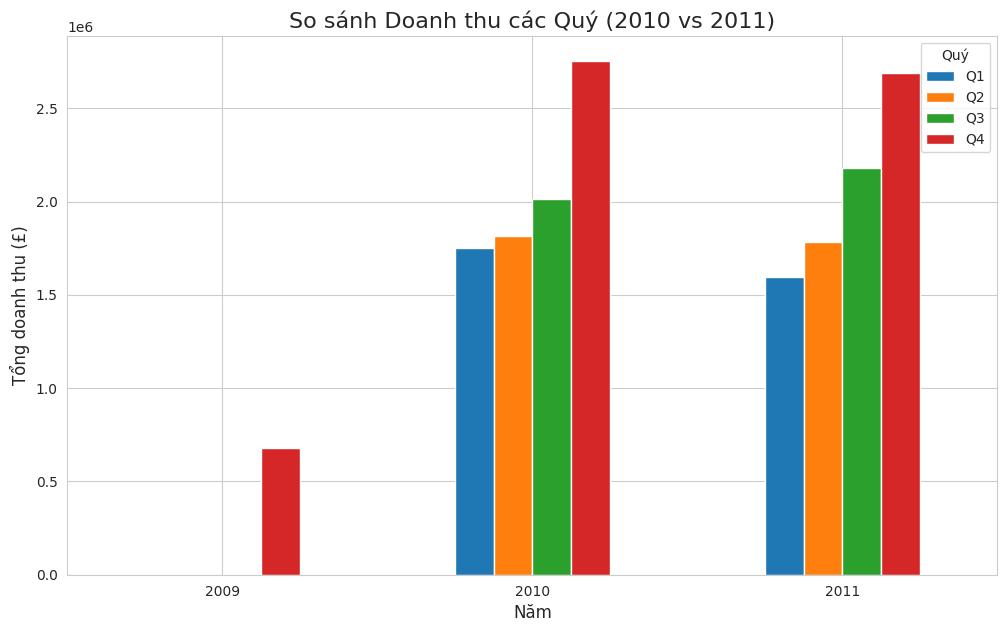

In [ ]:
# --- Câu 3: Phân tích doanh số theo Quý (để chẩn đoán Q2) ---
revenue_by_quarter = df_cleaned.groupby(['Year', 'Quarter'])['TotalPrice'].sum().unstack()

print("\n--- Tổng doanh thu theo Quý/Năm ---")
print(revenue_by_quarter)
print("\nĐang tạo biểu đồ...")

# Trực quan hóa
revenue_by_quarter.plot(kind='bar', figsize=(12, 7))
plt.title('So sánh Doanh thu các Quý (2010 vs 2011)', fontsize=16)
plt.xlabel('Năm', fontsize=12)
plt.ylabel('Tổng doanh thu (£)', fontsize=12)
plt.legend(title='Quý', labels=['Q1', 'Q2', 'Q3', 'Q4'])
plt.xticks(rotation=0)
plt.savefig("revenue_by_quarter_barchart.png")
print("Đã lưu biểu đồ 'revenue_by_quarter_barchart.png'")
plt.show()

#### 4.Các nhóm khách hàng nào đem lại doanh thu cao nhất? (Câu hỏi Khám phá)

Lỗi: Vui lòng chạy lại code của Phần B(5) và C(2) trước.

--- Phân tích Doanh thu theo Nhóm Khách hàng (Cluster) ---
         Total_Revenue  Customer_Count  Avg_Revenue_Per_Customer
Cluster                                                         
1         1.121745e+07            3840               2921.212087
2         2.833773e+06              35              80964.940057
3         1.712597e+06               4             428149.247500
0         1.486332e+06            1998                743.909871

Đang tạo biểu đồ...
Đã lưu biểu đồ 'cluster_revenue_summary.png'


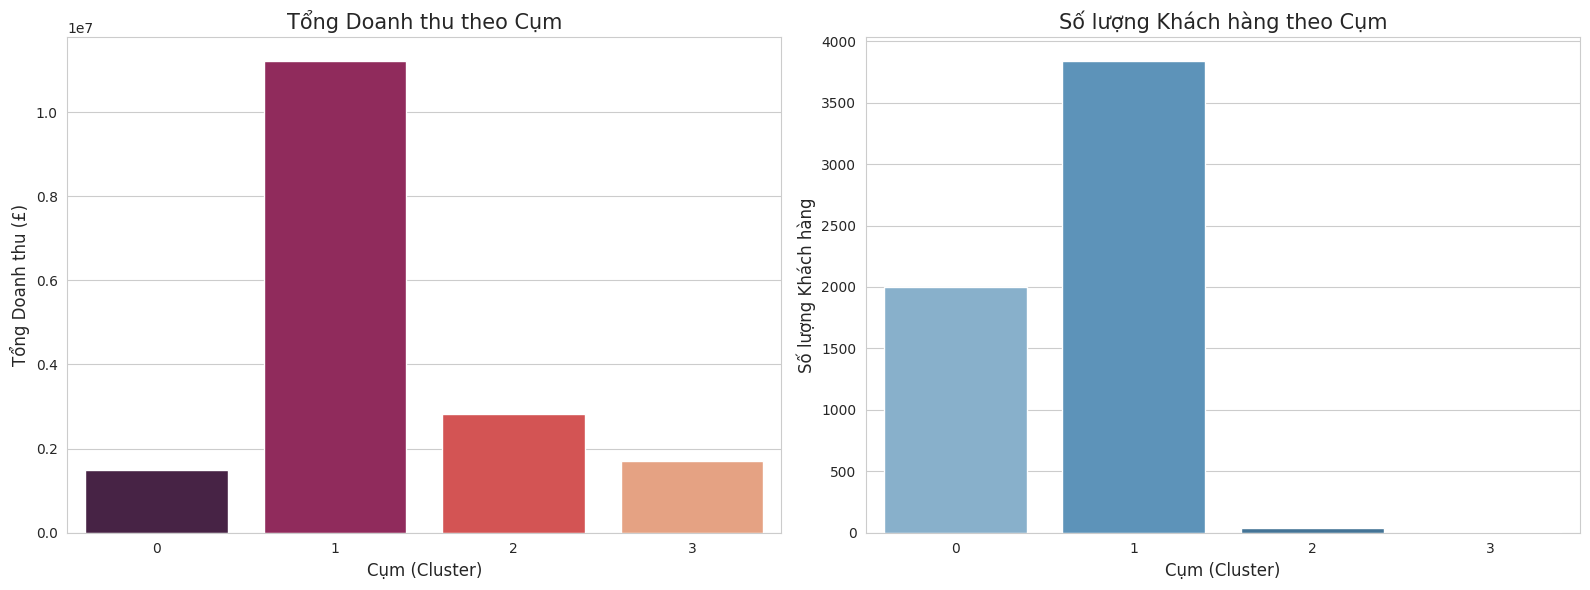

In [ ]:
# --- Câu 4: Phân tích các nhóm khách hàng (từ kết quả C2) ---
# Tải lại file kết quả RFM đã gán Cluster (nếu cần)
try:
    rfm_with_clusters = pd.read_csv("rfm_data_with_clusters.csv")
except FileNotFoundError:
    print("Lỗi: Vui lòng chạy lại code của Phần B(5) và C(2) trước.")
    # Giả định rfm_data vẫn còn trong bộ nhớ từ bước trước
    rfm_with_clusters = rfm_data.copy()


print("\n--- Phân tích Doanh thu theo Nhóm Khách hàng (Cluster) ---")
# Tính tổng doanh thu và số lượng khách hàng cho mỗi cụm
cluster_summary = rfm_with_clusters.groupby('Cluster')['Monetary'].agg(['sum', 'count'])
cluster_summary.columns = ['Total_Revenue', 'Customer_Count']

# Tính doanh thu trung bình mỗi khách hàng
cluster_summary['Avg_Revenue_Per_Customer'] = cluster_summary['Total_Revenue'] / cluster_summary['Customer_Count']
cluster_summary = cluster_summary.sort_values(by='Total_Revenue', ascending=False)

print(cluster_summary)
print("\nĐang tạo biểu đồ...")

# Trực quan hóa Doanh thu theo Cụm
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Biểu đồ 1: Tổng doanh thu
sns.barplot(x=cluster_summary.index, y=cluster_summary['Total_Revenue'], ax=ax1, palette='rocket')
ax1.set_title('Tổng Doanh thu theo Cụm', fontsize=15)
ax1.set_xlabel('Cụm (Cluster)', fontsize=12)
ax1.set_ylabel('Tổng Doanh thu (£)', fontsize=12)

# Biểu đồ 2: Số lượng khách hàng
sns.barplot(x=cluster_summary.index, y=cluster_summary['Customer_Count'], ax=ax2, palette='Blues_d')
ax2.set_title('Số lượng Khách hàng theo Cụm', fontsize=15)
ax2.set_xlabel('Cụm (Cluster)', fontsize=12)
ax2.set_ylabel('Số lượng Khách hàng', fontsize=12)

plt.tight_layout()
plt.savefig("cluster_revenue_summary.png")
print("Đã lưu biểu đồ 'cluster_revenue_summary.png'")
plt.show()

### (2) Phân tích Cụm (Clustering) - (Y/c: "Phân loại khách hàng")

--- Bắt đầu Phần C (2): Phân tích Cụm ---
Sử dụng dữ liệu RFM đã chuẩn hóa (Shape: (5877, 3))

Đã huấn luyện mô hình KMeans với K=4.
Điểm Silhouette (Silhouette Score): 0.591

--- Phân tích đặc điểm trung bình của các cụm (RFM) ---
         Recency_Avg  Frequency_Avg   Monetary_Avg  Count
Cluster                                                  
2           3.500000     211.000000  428149.247500      4
3          24.263158      99.894737   77367.770053     38
1          67.037529       7.246286    2895.817580   3837
0         462.833333       2.209710     743.909871   1998

Đã lưu biểu đồ boxplot phân tích cụm vào 'rfm_cluster_boxplots.png'


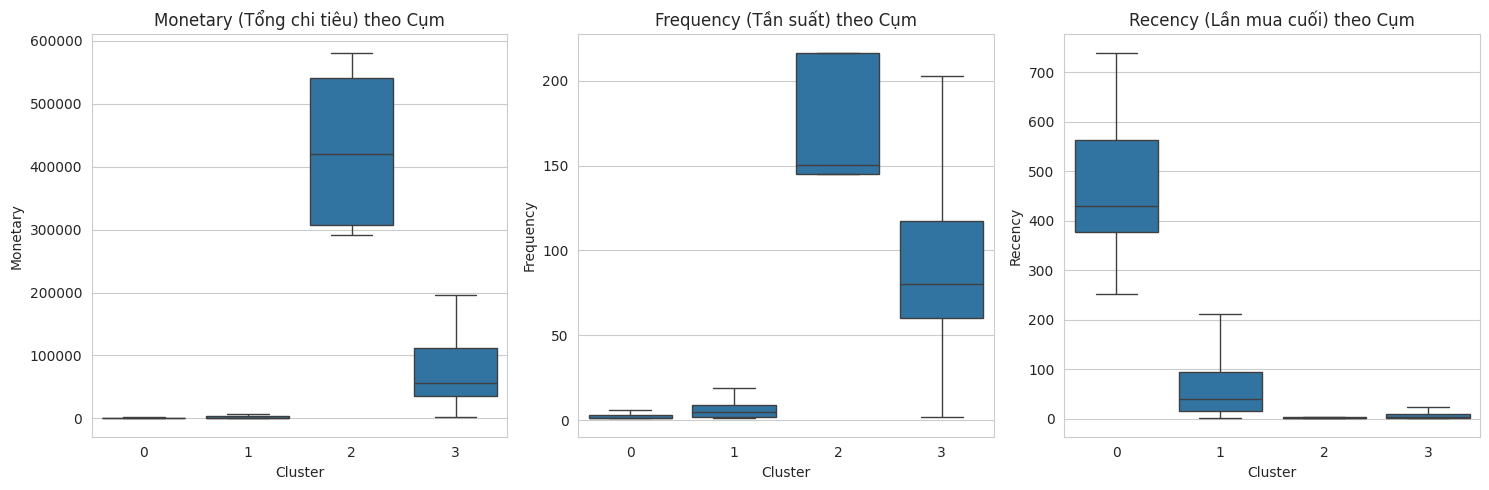

In [ ]:
# --- Bước 1: Tải dữ liệu đã chuẩn bị từ Phần B (5) ---

print("--- Bắt đầu Phần C (2): Phân tích Cụm ---")
print(f"Sử dụng dữ liệu RFM đã chuẩn hóa (Shape: {rfm_scaled_data.shape})")

# --- Bước 2: Huấn luyện mô hình K-Means ---
# Chọn K=4 cụm (đây là một lựa chọn phổ biến, bạn có thể dùng Elbow method để tìm K tối ưu)
n_clusters = 4
kmeans_model = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42, n_init=10)
kmeans_model.fit(rfm_scaled_data)

# Gán nhãn cụm (cluster) trở lại DataFrame rfm_data gốc
rfm_data['Cluster'] = kmeans_model.labels_

print(f"\nĐã huấn luyện mô hình KMeans với K={n_clusters}.")

# --- Bước 3: Đánh giá mô hình ---
silhouette_avg = silhouette_score(rfm_scaled_data, kmeans_model.labels_)
print(f"Điểm Silhouette (Silhouette Score): {silhouette_avg:.3f}")
# Điểm Silhouette càng gần 1, các cụm càng tách biệt rõ ràng.

# --- Bước 4: Phân tích và Diễn giải các Cụm (Trả lời câu hỏi) ---
# Tính toán giá trị trung bình của R, F, M cho mỗi cụm
cluster_analysis = rfm_data.groupby('Cluster').agg(
    Recency_Avg=('Recency', 'mean'),
    Frequency_Avg=('Frequency', 'mean'),
    Monetary_Avg=('Monetary', 'mean'),
    Count=('Cluster', 'size')
).sort_values(by='Monetary_Avg', ascending=False)

print("\n--- Phân tích đặc điểm trung bình của các cụm (RFM) ---")
print(cluster_analysis)

# Lưu kết quả phân tích cụm
cluster_analysis.to_csv("rfm_cluster_analysis.csv")

# --- Bước 5: Trực quan hóa kết quả ---
# Trực quan hóa phân bổ R, F, M theo từng cụm
plt.figure(figsize=(15, 5))

# Monetary
plt.subplot(1, 3, 1)
sns.boxplot(x='Cluster', y='Monetary', data=rfm_data, showfliers=False) # showfliers=False để ẩn outlier cho dễ nhìn
plt.title('Monetary (Tổng chi tiêu) theo Cụm')

# Frequency
plt.subplot(1, 3, 2)
sns.boxplot(x='Cluster', y='Frequency', data=rfm_data, showfliers=False)
plt.title('Frequency (Tần suất) theo Cụm')

# Recency
plt.subplot(1, 3, 3)
sns.boxplot(x='Cluster', y='Recency', data=rfm_data, showfliers=False)
plt.title('Recency (Lần mua cuối) theo Cụm')

plt.tight_layout()
plt.savefig("rfm_cluster_boxplots.png")
print("\nĐã lưu biểu đồ boxplot phân tích cụm vào 'rfm_cluster_boxplots.png'")

### (3) Phân tích Kết hợp (Association) - (Y/c: "Kết hợp giỏ hàng")

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Giả định df_cleaned đã có sẵn từ Phần B
print("--- Bắt đầu Phần C (3): Phân tích Kết hợp ---")
print("Đang chuẩn bị dữ liệu cho Phân tích Giỏ hàng (Apriori)...")

# 1. Tạo 'basket': nhóm theo Hóa đơn (Invoice) và Tên sản phẩm (Description).
# Chúng ta dùng .sum() sau đó unstack() để xoay bảng, biến tên sản phẩm thành các cột.
# fillna(0) để điền 0 cho các sản phẩm không có trong hóa đơn đó.
basket = df_cleaned.groupby(['Invoice', 'Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('Invoice')

# 2. Mã hóa (Encode): Chuyển đổi dữ liệu số lượng thành 1 (có mua) hoặc 0 (không mua)
# Apriori chỉ quan tâm sản phẩm có xuất hiện (1) hay không (0).
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)

print("Đã tạo xong ma trận one-hot (basket_sets).")
print(f"Kích thước ma trận: {basket_sets.shape[0]} hóa đơn, {basket_sets.shape[1]} sản phẩm.")
print(basket_sets.head())

# --- Bước 1: Chạy Apriori ---
# Chúng ta tìm các tập sản phẩm (itemsets) xuất hiện trong ít nhất 2% (min_support=0.02)
# tổng số hóa đơn để giảm thời gian tính toán.
print("\nĐang chạy Apriori để tìm các tập phổ biến (min_support=0.02)...")
frequent_itemsets = apriori(basket_sets, min_support=0.02, use_colnames=True)

print("Đã tìm thấy tập phổ biến. Đang tạo luật kết hợp (metric='lift', min_threshold=1)...")

# --- Bước 2: Tạo Luật Kết hợp (Association Rules) ---
# Chúng ta dùng 'lift' > 1 để tìm các cặp có khả năng được mua cùng nhau cao hơn
# so với việc chúng được mua ngẫu nhiên.
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Sắp xếp kết quả theo 'lift' (độ thú vị) và 'confidence' (độ tin cậy)
top_rules = rules.sort_values(['lift', 'confidence'], ascending=[False, False])

print("\n--- 10 Luật kết hợp (Sản phẩm thường mua cùng nhau) mạnh nhất ---")
# Hiển thị các cột quan trọng
# - antecedents: sản phẩm A (nếu mua)
# - consequents: sản phẩm B (thì sẽ mua)
# - support: tỷ lệ hóa đơn chứa cả A và B
# - confidence: độ chắc chắn (nếu mua A thì sẽ mua B)
# - lift: độ tương quan (lift > 1 là tốt)
print(top_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))

# Lưu kết quả
top_rules.to_csv("association_rules.csv")
print("\nĐã lưu toàn bộ luật kết quả vào 'association_rules.csv'")

--- Bắt đầu Phần C (3): Phân tích Kết hợp ---
Đang chuẩn bị dữ liệu cho Phân tích Giỏ hàng (Apriori)...
Đã tạo xong ma trận one-hot (basket_sets).
Kích thước ma trận: 36859 hóa đơn, 5282 sản phẩm.
Description    DOORMAT UNION JACK GUNS AND ROSES   3 STRIPEY MICE FELTCRAFT  \
Invoice                                                                       
489434                                         0                          0   
489435                                         0                          0   
489436                                         0                          0   
489437                                         0                          0   
489438                                         0                          0   

Description   4 PURPLE FLOCK DINNER CANDLES   50'S CHRISTMAS GIFT BAG LARGE  \
Invoice                                                                       
489434                                    0                               0   
489435      

### (4) Mô hình hóa Dự đoán (Predictive Modeling) - (Y/c: "Dự đoán")

#### 1.Chuẩn bị Dữ liệu Chuỗi thời gian (Time-Series Aggregation)

In [ ]:
# Giả định df_cleaned đã có sẵn từ Phần B
# df_cleaned = pd.read_csv("path_to_your_cleaned_data.csv", parse_dates=['InvoiceDate'])
# df_cleaned['MonthYear'] = df_cleaned['InvoiceDate'].dt.to_period('M')
# df_cleaned['TotalPrice'] = df_cleaned['Quantity'] * df_cleaned['Price']

print("--- Bắt đầu Phần C (4): Mô hình hóa Dự đoán ---")
print("Đang tổng hợp doanh thu theo tháng...")

# 1. Nhóm theo 'MonthYear' (đã tạo ở B4) và tính tổng TotalPrice
# Chúng ta dùng .to_timestamp() để chuyển từ Period (ví dụ: 2010-12) về Datetime (2010-12-01)
# điều này giúp việc tạo đặc trưng trễ (lag) dễ dàng hơn.
df_monthly_revenue = df_cleaned.groupby('MonthYear')['TotalPrice'].sum().reset_index()
df_monthly_revenue['MonthYear'] = df_monthly_revenue['MonthYear'].dt.to_timestamp()
df_monthly_revenue = df_monthly_revenue.set_index('MonthYear')
df_monthly_revenue.columns = ['TotalPrice']

# 2. Dữ liệu tháng 12/2011 bị thiếu (chỉ có 9 ngày).
# Chúng ta sẽ loại bỏ nó khỏi tập huấn luyện/kiểm thử để tránh làm sai lệch mô hình.
df_monthly_revenue = df_monthly_revenue[df_monthly_revenue.index < '2011-12-01']

print("Dữ liệu doanh thu hàng tháng (df_monthly_revenue):")
print(df_monthly_revenue.tail()) # Hiển thị 5 tháng cuối

--- Bắt đầu Phần C (4): Mô hình hóa Dự đoán ---
Đang tổng hợp doanh thu theo tháng...
Dữ liệu doanh thu hàng tháng (df_monthly_revenue):
             TotalPrice
MonthYear              
2011-07-01   593651.561
2011-08-01   638865.090
2011-09-01   944795.702
2011-10-01  1027648.950
2011-11-01  1145855.660


#### 2.Kỹ thuật Đặc trưng (Feature Engineering cho Time-Series)

In [ ]:
print("\nĐang tạo các đặc trưng trễ (lag features)...")

# Tạo đặc trưng trễ (lag features)
df_model_data = df_monthly_revenue.copy()
df_model_data['Lag_1'] = df_model_data['TotalPrice'].shift(1)  # Doanh thu tháng trước
df_model_data['Lag_12'] = df_model_data['TotalPrice'].shift(12) # Doanh thu 12 tháng trước (mùa vụ)

# Xóa các dòng NaN (12 dòng đầu tiên) do phép .shift(12) tạo ra
df_model_data = df_model_data.dropna()

print("Dữ liệu đã sẵn sàng để huấn luyện mô hình (5 dòng đầu):")
print(df_model_data.head())

# Định nghĩa X (features) và y (target)
X = df_model_data[['Lag_1', 'Lag_12']]
y = df_model_data['TotalPrice']


Đang tạo các đặc trưng trễ (lag features)...
Dữ liệu đã sẵn sàng để huấn luyện mô hình (5 dòng đầu):
            TotalPrice        Lag_1      Lag_12
MonthYear                                      
2010-12-01  565992.730  1158347.122  680601.010
2011-01-01  562992.310   565992.730  553112.672
2011-02-01  442918.920   562992.310  501838.956
2011-03-01  588756.760   442918.920  693654.871
2011-04-01  464964.381   588756.760  588264.002


#### 3.Chia tập Train/Test theo Mốc thời gian

In [ ]:
# Chia tập Train/Test (KHÔNG XÁO TRỘN)
# Chúng ta có dữ liệu từ 2010-12 đến 2011-11 (12 tháng sau khi dropna)
# Chia 6 tháng train, 6 tháng test
test_size = 6
X_train = X[:-test_size]
X_test = X[-test_size:]
y_train = y[:-test_size]
y_test = y[-test_size:]

print(f"\nKích thước tập Train: {len(X_train)} tháng")
print(f"Kích thước tập Test: {len(X_test)} tháng")


Kích thước tập Train: 6 tháng
Kích thước tập Test: 6 tháng


#### 4.Huấn luyện, Dự đoán và Đánh giá


Đang huấn luyện mô hình LinearRegression...

--- Đánh giá mô hình trên tập Test (6 tháng cuối) ---
R-squared (R²): 0.298
RMSE (Lỗi dự đoán trung bình): £179365.99

Đang tạo biểu đồ so sánh Thực tế vs. Dự đoán...


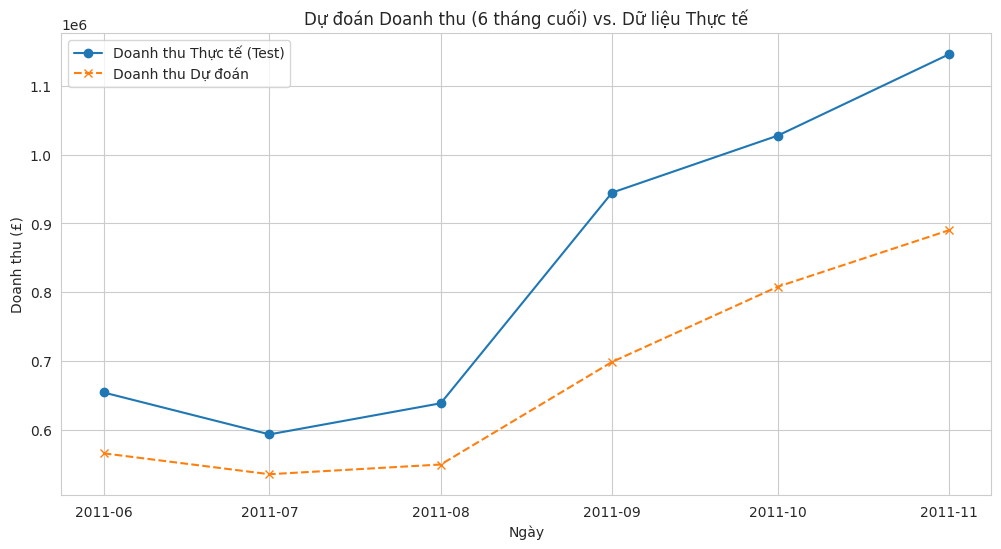

In [ ]:
# --- 4.1. Huấn luyện mô hình ---
print("\nĐang huấn luyện mô hình LinearRegression...")
model = LinearRegression()
model.fit(X_train, y_train)

# --- 4.2. Dự đoán trên tập Test ---
y_pred = model.predict(X_test)

# --- 4.3. Đánh giá mô hình ---
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"\n--- Đánh giá mô hình trên tập Test (6 tháng cuối) ---")
print(f"R-squared (R²): {r2:.3f}")
print(f"RMSE (Lỗi dự đoán trung bình): £{rmse:.2f}")

# --- 4.4. Trực quan hóa kết quả Test ---
print("\nĐang tạo biểu đồ so sánh Thực tế vs. Dự đoán...")
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Doanh thu Thực tế (Test)', marker='o')
plt.plot(y_test.index, y_pred, label='Doanh thu Dự đoán', marker='x', linestyle='--')
plt.title('Dự đoán Doanh thu (6 tháng cuối) vs. Dữ liệu Thực tế')
plt.xlabel('Ngày')
plt.ylabel('Doanh thu (£)')
plt.legend()
plt.savefig("revenue_prediction_test_set.png")
plt.show()

### (5) Giảm chiều dữ liệu (Dimensionality Reduction) - (Y/c: "Giảm chiều")

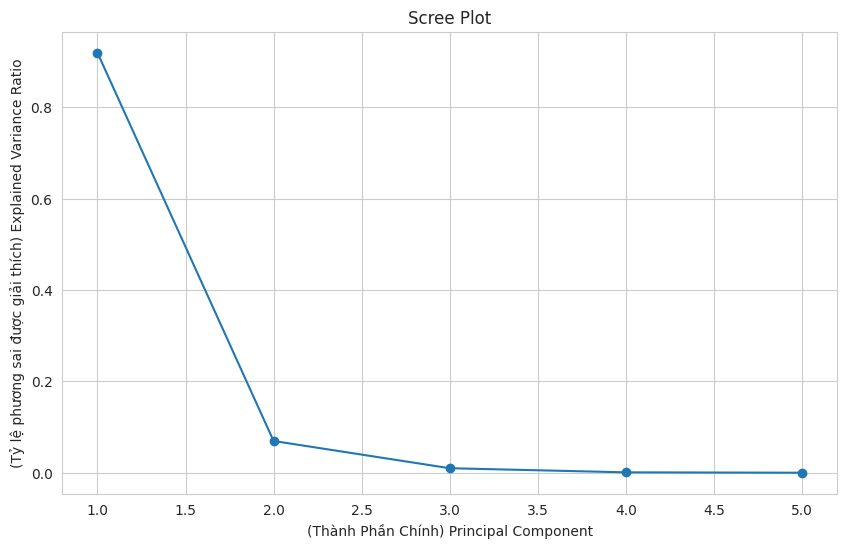

In [ ]:
# Select only numerical columns for PCA
numerical_df = df_cleaned[['Quantity', 'Price', 'TotalPrice', 'Year', 'Month', 'Quarter', 'Day', 'DayOfWeek', 'Hour']]

# Drop rows with any NaN values from the numerical DataFrame
numerical_df = numerical_df.dropna()

pca = PCA(n_components=5)

principle_component = pca.fit_transform(numerical_df)
plt.plot(np.arange(1, pca.n_components_ + 1), pca.explained_variance_ratio_, marker='o', linestyle='-')
plt.xlabel('(Thành Phần Chính) Principal Component')
plt.ylabel('(Tỷ lệ phương sai được giải thích) Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

## PHẦN D: TRỰC QUAN HÓA (DASHBOARD - 2 ĐIỂM) dùng streamlit ngoài colab

### (1) Công cụ Streamlit

### (2) Thiết kế "Câu chuyện dữ liệu" (Data Storytelling)

### (3) Trình bày

## PHẦN E: ỨNG DỤNG (APPLICATION - 1 ĐIỂM) dùng n8n

### (1) Ý tưởng 1 (Tự động hóa PTDL): Xây dựng 1 workflow trên n8n tự động:

### (2) Ý tưởng 2 (Tư vấn GenAI): Xây dựng 1 workflow n8n kết hợp GenAI (ví dụ: OpenAI node

### (3) Trình bày: Chụp ảnh màn hình workflow n8n đã thiết kế và kết quả đầu ra

## PHẦN F: KẾT LUẬN VÀ HƯỚNG PHÁT TRIỂN

### (1) Tổng kết kết quả: Tóm tắt lại các phát hiện chính (insight) từ Phần C và D.

### (2) Hạn chế của dự án

### (3) Hướng phát triển tương lai